In [10]:
#by Willkie
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
#https://discord.com/channels/1134059900666916935/1283610000484208670

In [11]:
%run data_loading.ipynb

Data saved as data/output/1219.csv
Processed valid data saved as data/output/1219_processed.csv
Data saved as data/output/1218.csv
Processed valid data saved as data/output/1218_processed.csv
Data saved as data/output/1213.csv
Processed valid data saved as data/output/1213_processed.csv
Data saved as data/output/1212.csv
Processed valid data saved as data/output/1212_processed.csv
Data saved as data/output/1211.csv
Processed valid data saved as data/output/1211_processed.csv
Data saved as data/output/1215.csv
Processed valid data saved as data/output/1215_processed.csv
Data saved as data/output/1214.csv
Processed valid data saved as data/output/1214_processed.csv
Data saved as data/output/1216.csv
Processed valid data saved as data/output/1216_processed.csv
Data saved as data/output/1217.csv
Processed valid data saved as data/output/1217_processed.csv
Combined raw data saved as 'data/output/df.csv'
Combined valid processed data saved as 'data/output/processed_df.csv'


In [12]:
df = pd.read_csv("data/output/df.csv")
df

,party_id,time,level,job,spec,map,date,valid,valid_spec,spec_by_level,avg_spec_by_level,spec_filled
0,1,오전 12:33,88.0,허밋,NaN,붉켄,2024-12-19,True,False,18.521609,18.521609,1629.901549
1,1,오전 12:33,101.0,레인저,NaN,붉켄,2024-12-19,True,False,23.800000,23.800000,2403.800000
2,2,오전 12:33,90.0,허밋,NaN,붉켄,2024-12-19,True,False,18.521609,18.521609,1666.944766
3,2,오전 12:33,99.0,허밋,NaN,붉켄,2024-12-19,True,False,18.521609,18.521609,1833.639243
4,2,오전 12:33,105.0,썬콜,650.0,붉켄,2024-12-19,True,True,6.190476,6.247673,650.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2863,292,오후 1:59,143.0,용기사,5000.0,블와둥,2024-12-17,True,True,34.965035,35.282984,5000.000000
2864,297,오후 1:59,119.0,프리스트,NaN,검켄,2024-12-17,True,False,6.320755,6.320755,752.169811
2865,297,오후 1:59,134.0,프리스트,NaN,검켄,2024-12-17,True,False,6.320755,6.320755,846.981132
2866,300,오후 1:59,123.0,프리스트,NaN,NaN,2024-12-17,False,False,6.320755,6.320755,777.452830


In [13]:
processed_df = pd.read_csv("data/output/processed_df.csv")
processed_df

,party_id,time,level,job,spec,map,date,valid,valid_spec,spec_by_level,avg_spec_by_level,spec_filled
0,2,오전 12:33,105,썬콜,650,붉켄,2024-12-19,True,True,6.190476,6.247673,650.0
1,2,오전 12:33,118,썬콜,726,붉켄,2024-12-19,True,True,6.152542,6.247673,726.0
2,13,오전 12:34,128,불독,795,협동,2024-12-19,True,True,6.210938,6.210938,795.0
3,18,오전 12:34,124,용기사,4200,블와둥,2024-12-19,True,True,33.870968,34.780991,4200.0
4,34,오전 12:35,144,허밋,2652,망용둥,2024-12-19,True,True,18.416667,18.521609,2652.0
...,...,...,...,...,...,...,...,...,...,...,...,...
326,260,오후 1:57,106,나이트,3143,듀파,2024-12-17,True,True,29.650943,30.555809,3143.0
327,260,오후 1:57,89,나이트,2800,듀파,2024-12-17,True,True,31.460674,30.555809,2800.0
328,263,오후 1:57,106,프리스트,670,불어전,2024-12-17,True,True,6.320755,6.320755,670.0
329,263,오후 1:57,107,용기사,3400,불어전,2024-12-17,True,True,31.775701,35.282984,3400.0


In [14]:
hermit = processed_df[(processed_df['job'] == '허밋')]
hermit

,party_id,time,level,job,spec,map,date,valid,valid_spec,spec_by_level,avg_spec_by_level,spec_filled
4,34,오전 12:35,144,허밋,2652,망용둥,2024-12-19,True,True,18.416667,18.521609,2652.0
6,51,오전 12:35,138,허밋,2540,협동,2024-12-19,True,True,18.405797,18.521609,2540.0
8,55,오전 12:36,99,허밋,1840,듀파,2024-12-19,True,True,18.585859,18.521609,1840.0
10,56,오전 12:36,153,허밋,2982,큰둥,2024-12-19,True,True,19.490196,18.521609,2982.0
17,89,오전 12:37,145,허밋,2600,깊바협,2024-12-19,True,True,17.931034,18.521609,2600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
310,161,오후 1:52,140,허밋,2700,협동,2024-12-17,True,True,19.285714,18.956725,2700.0
311,161,오후 1:52,133,허밋,2400,협동,2024-12-17,True,True,18.045113,18.956725,2400.0
314,163,오후 1:52,124,허밋,2500,협동,2024-12-17,True,True,20.161290,18.956725,2500.0
317,197,오후 1:54,124,허밋,2520,협동,2024-12-17,True,True,20.322581,18.956725,2520.0


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868 entries, 0 to 2867
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   party_id           2868 non-null   int64  
 1   time               2868 non-null   object 
 2   level              2829 non-null   float64
 3   job                2868 non-null   object 
 4   spec               388 non-null    float64
 5   map                2550 non-null   object 
 6   date               2868 non-null   object 
 7   valid              2868 non-null   bool   
 8   valid_spec         2868 non-null   bool   
 9   spec_by_level      2700 non-null   float64
 10  avg_spec_by_level  2700 non-null   float64
 11  spec_filled        2665 non-null   float64
dtypes: bool(2), float64(5), int64(1), object(4)
memory usage: 229.8+ KB
None

Data Overview:
   party_id      time  level  job   spec map        date  valid  valid_spec  \
0         1  오전 12:33   88.0   허밋   

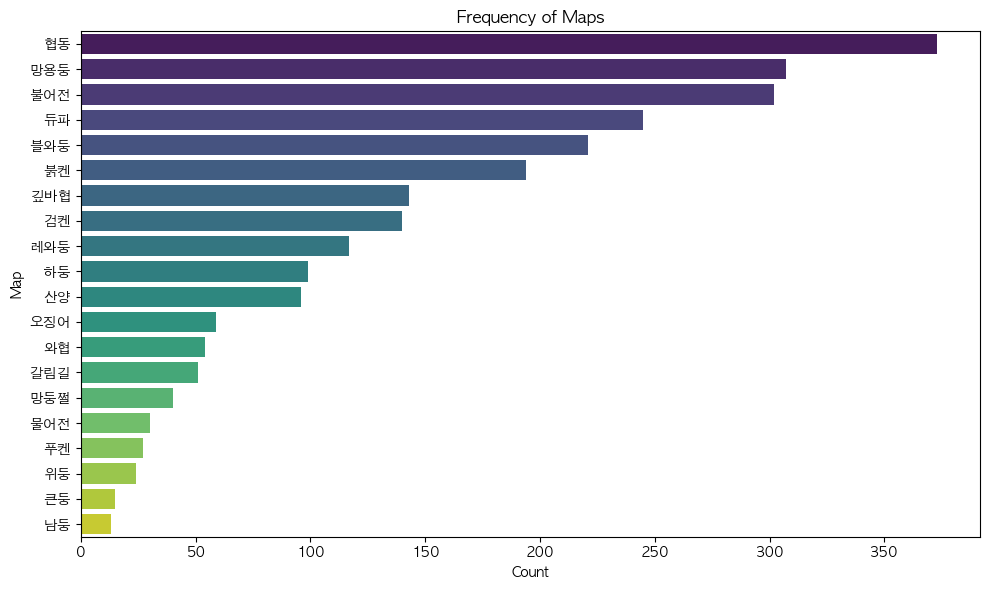

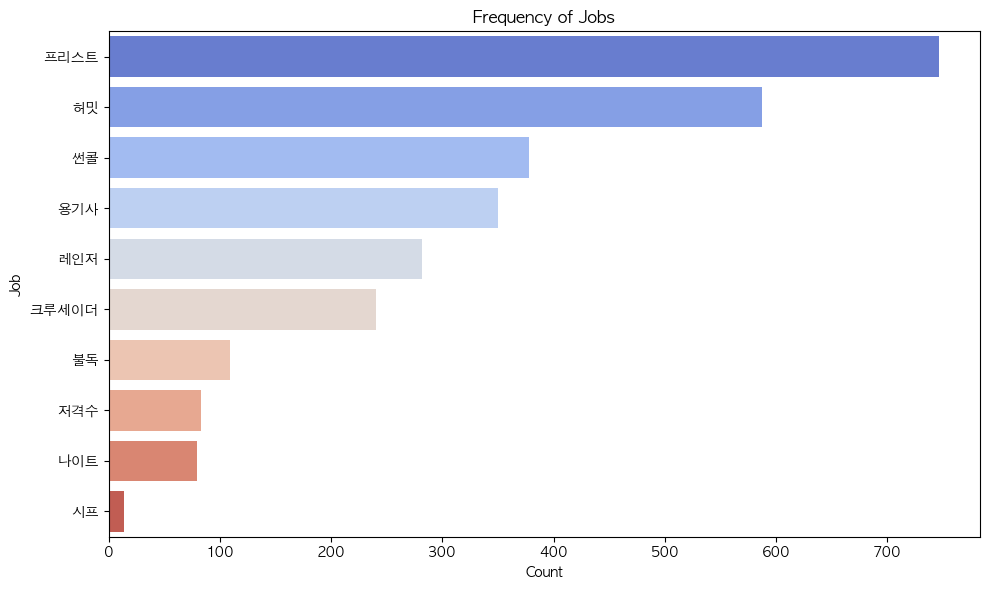

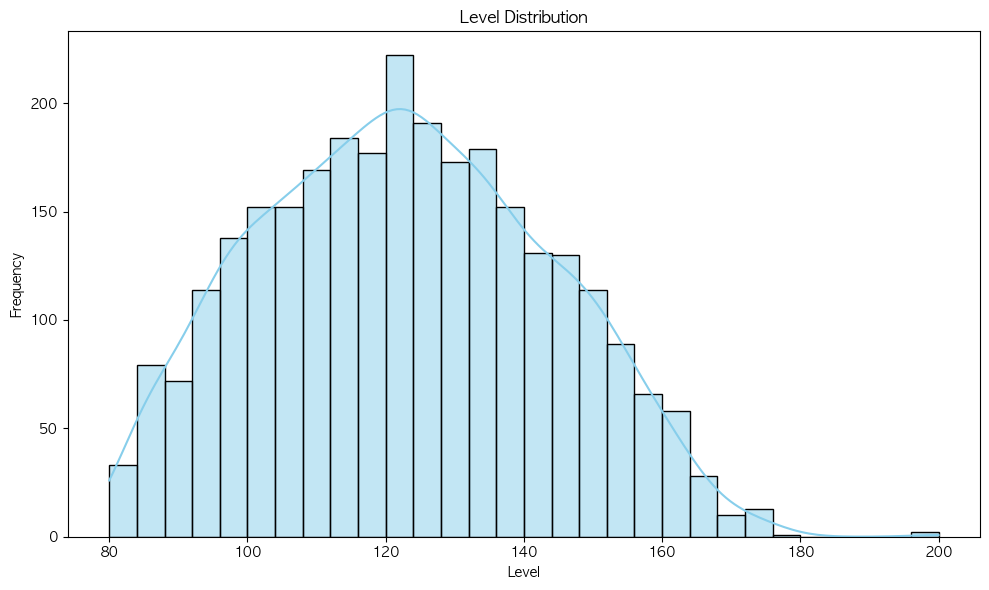

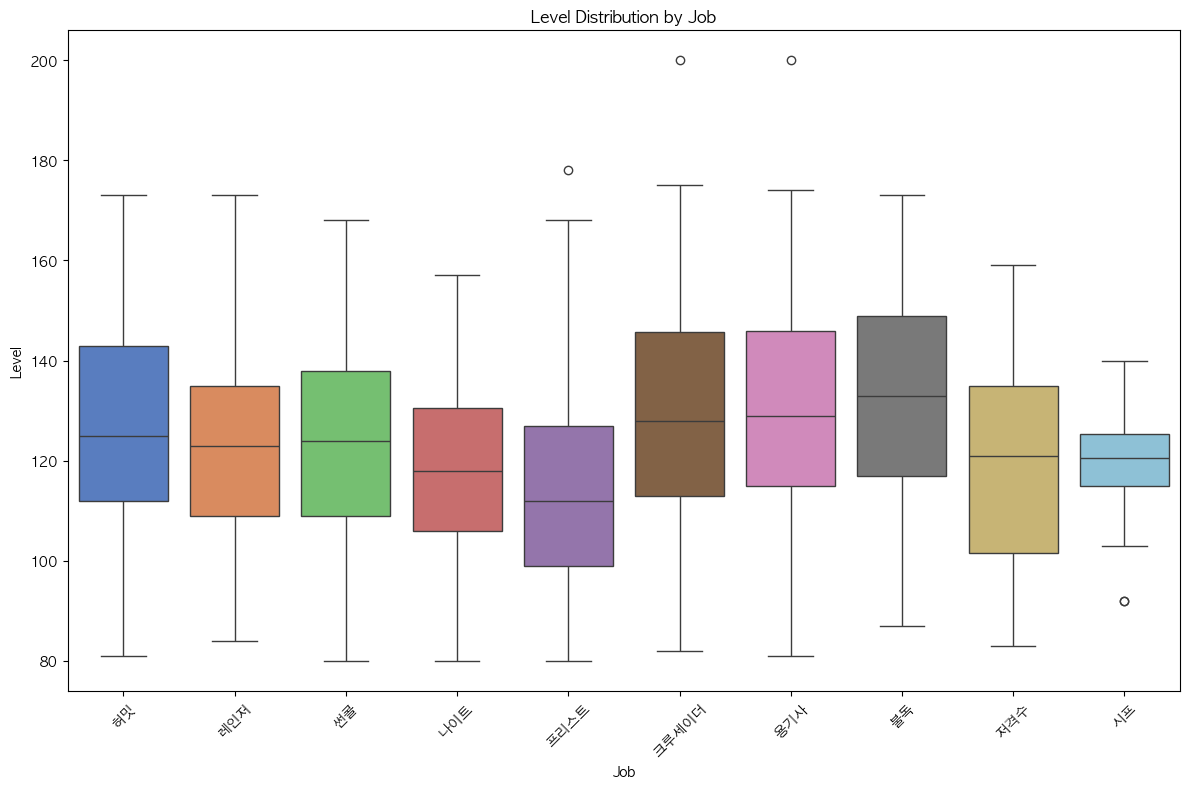

In [15]:
%run eda.ipynb

map_dist(df)
job_dist(df)
level_dist(df)
level_dist_by_job(df)

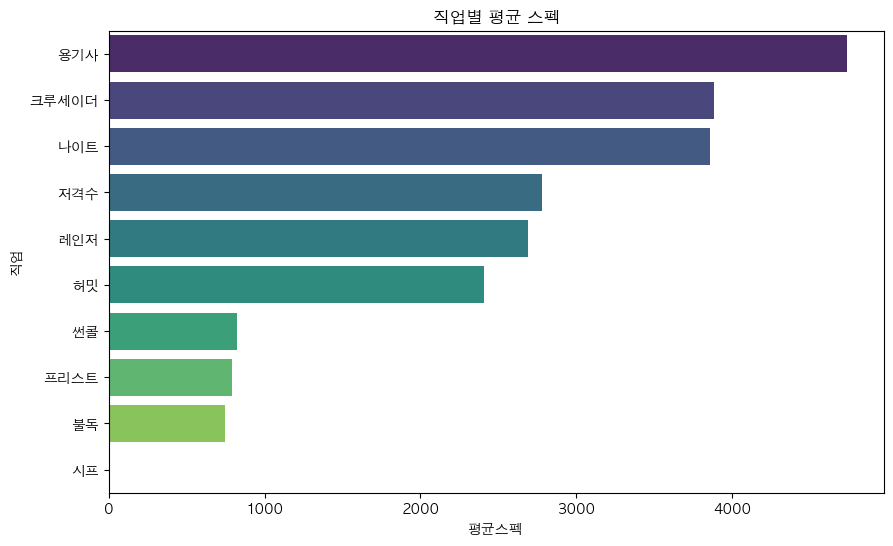

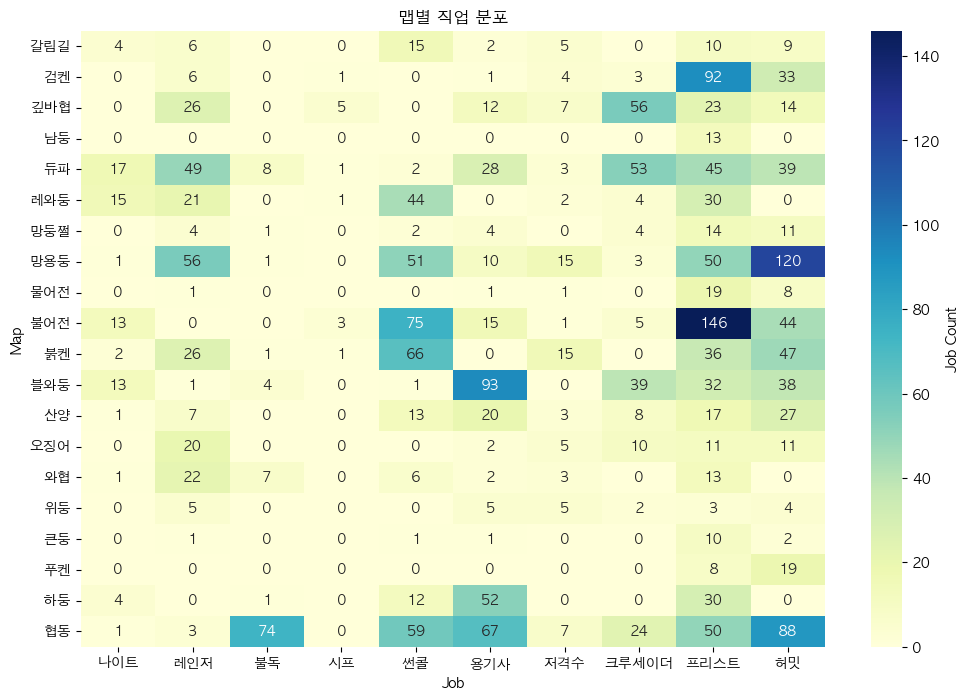

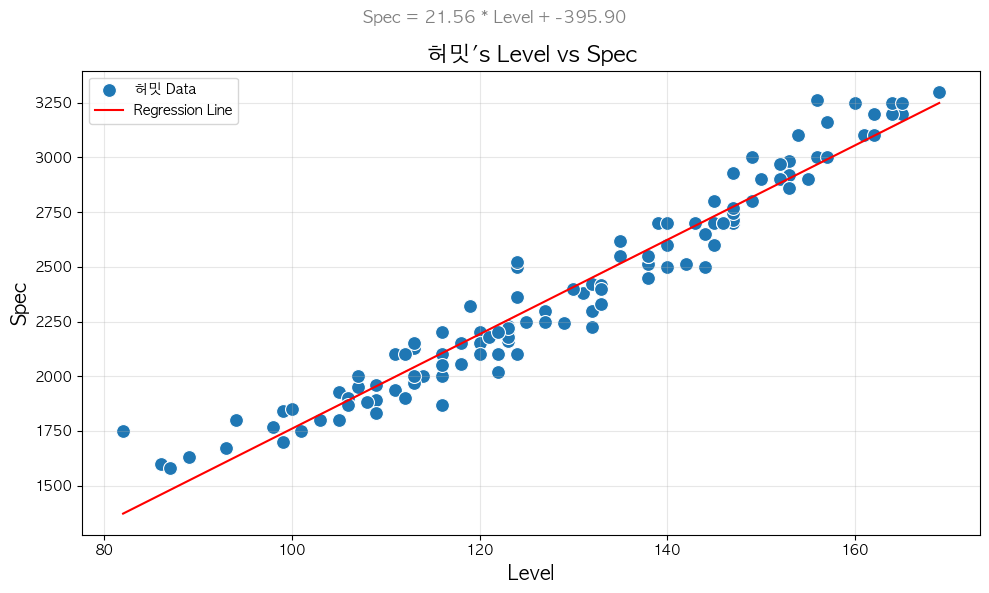

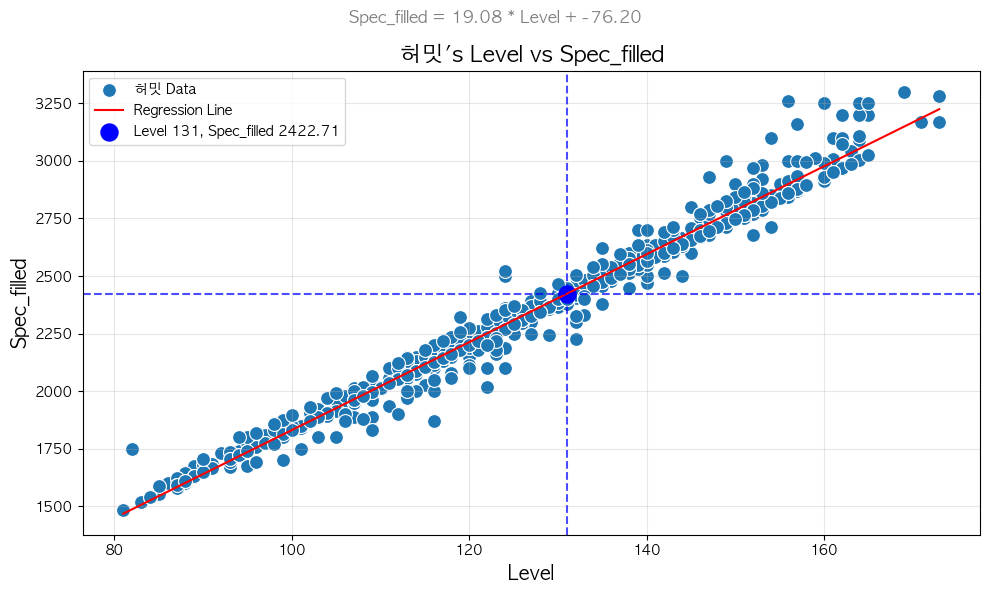

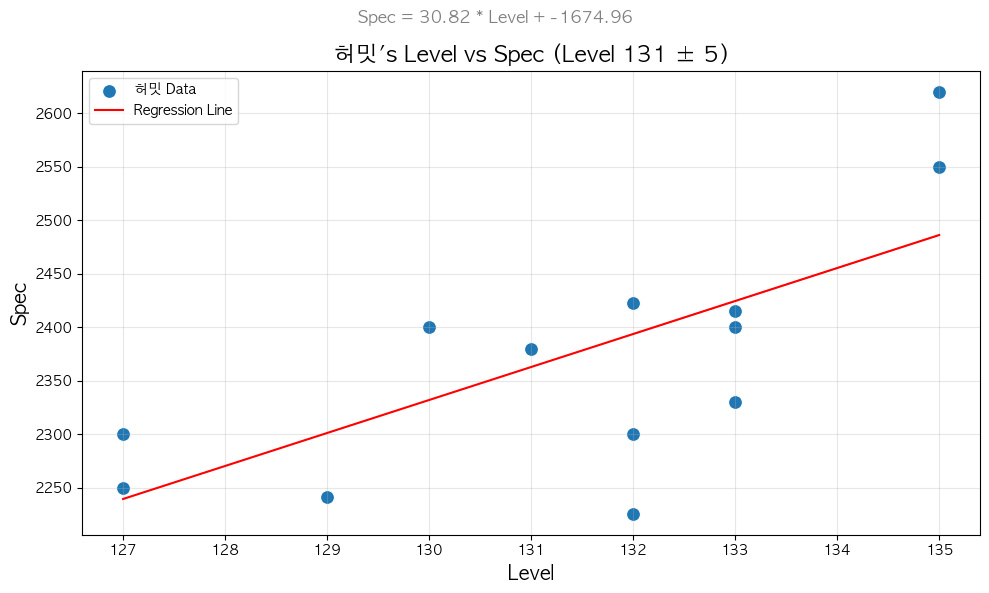

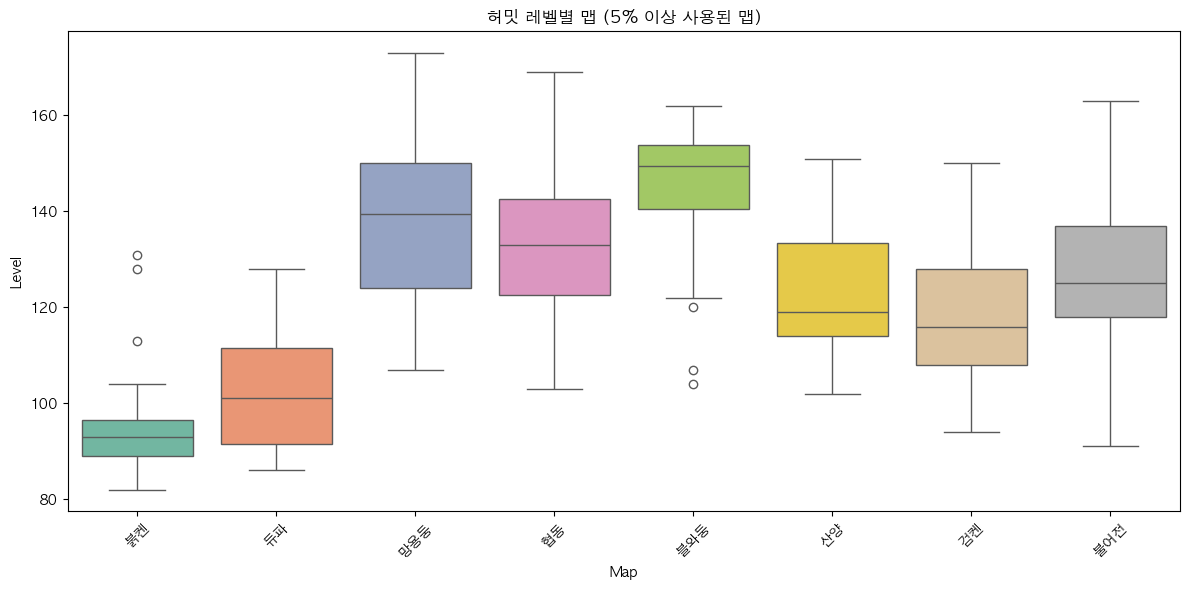

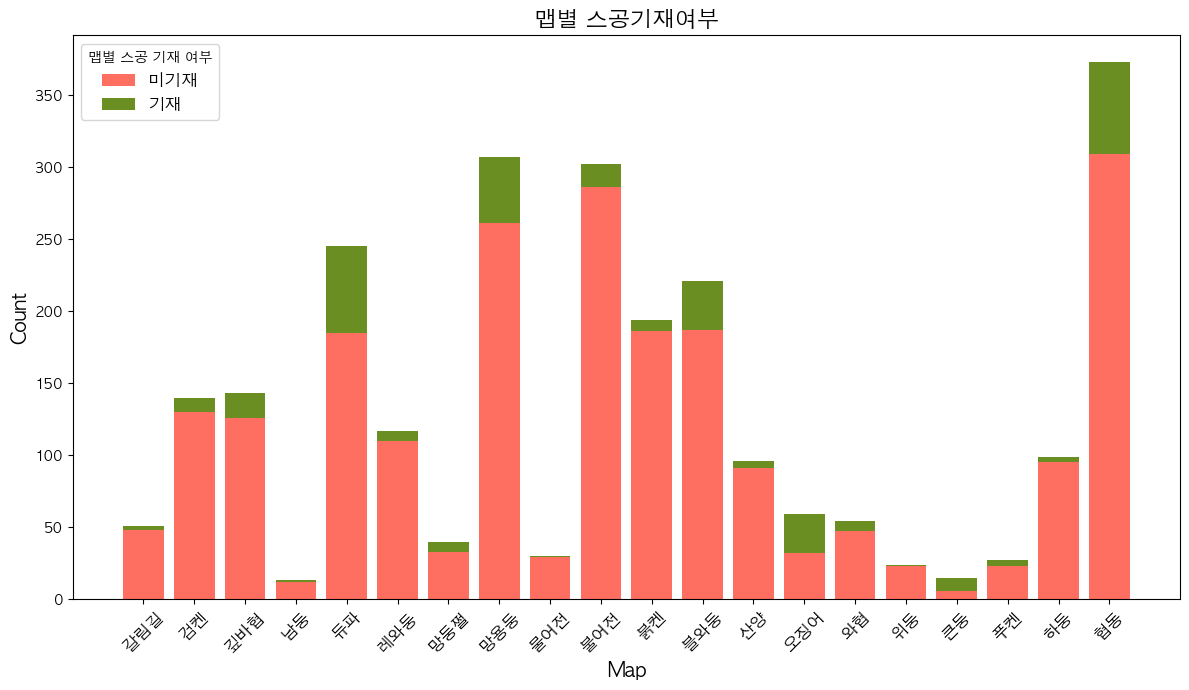

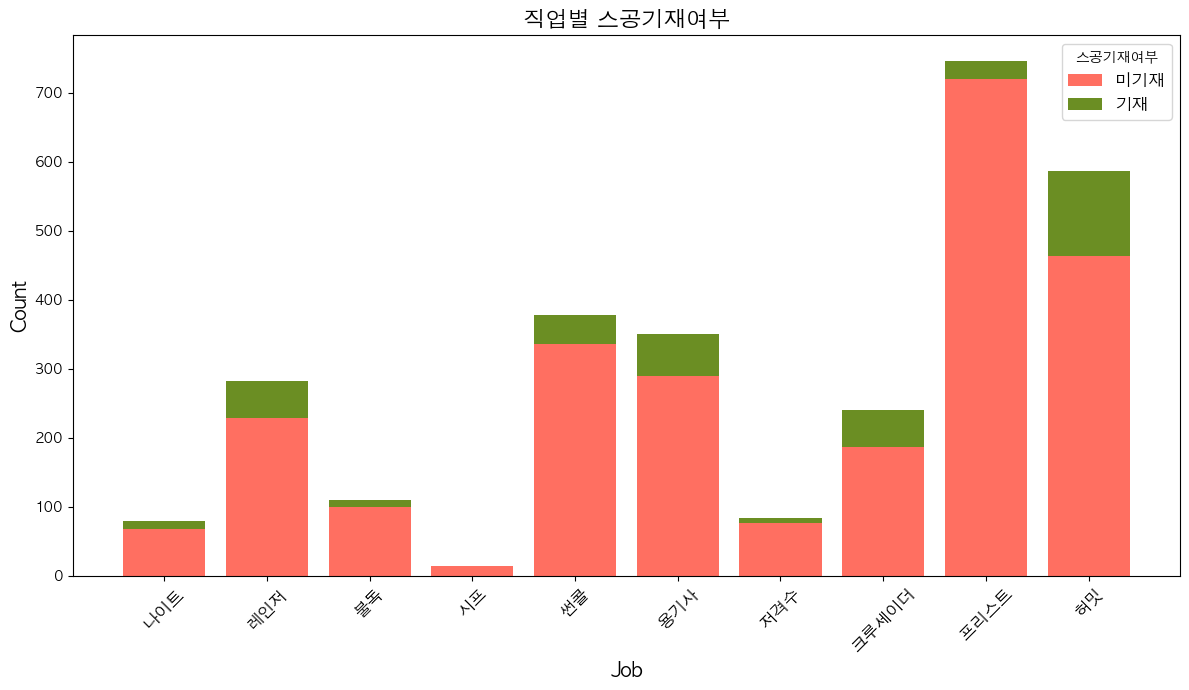

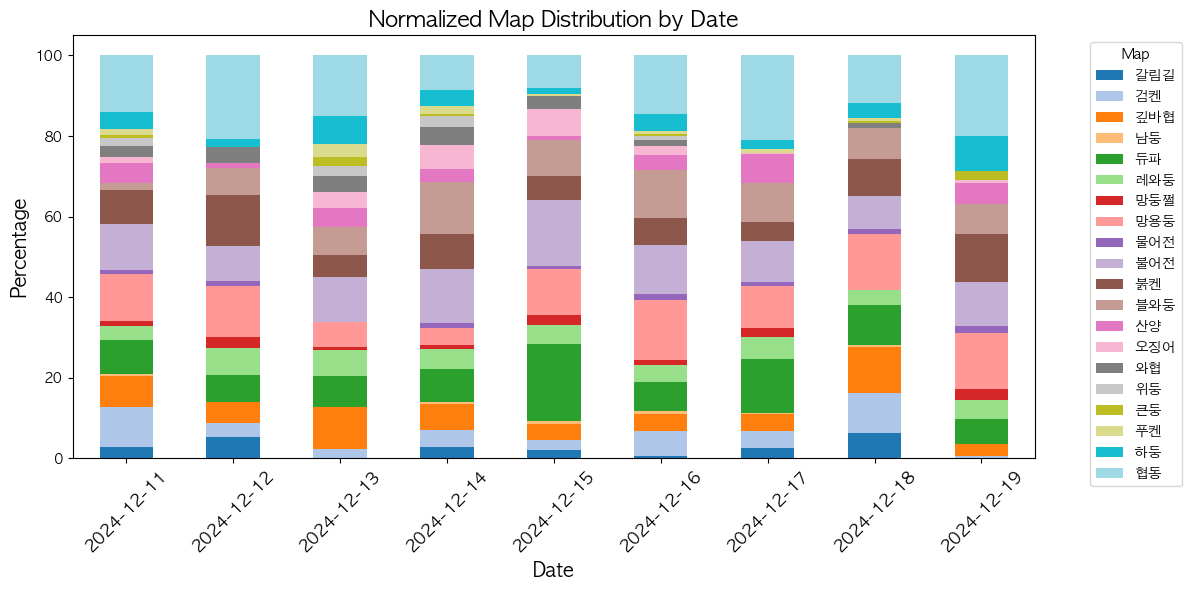

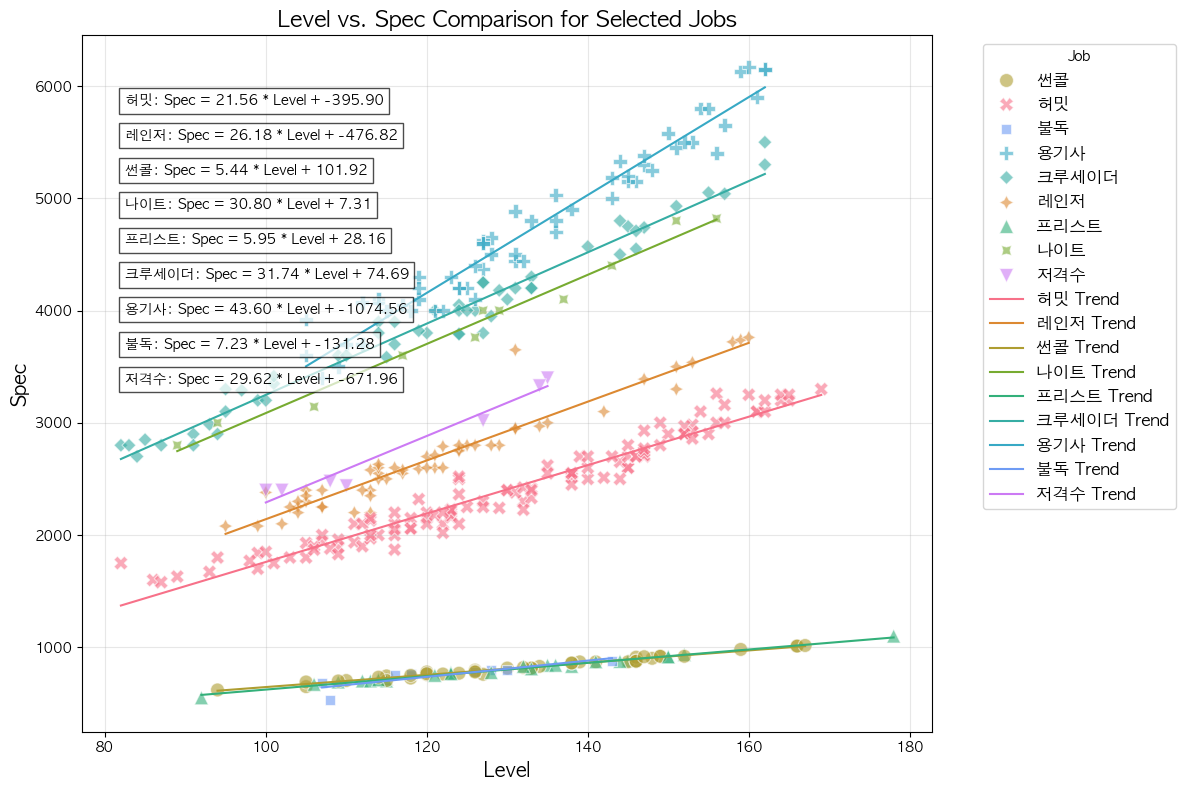

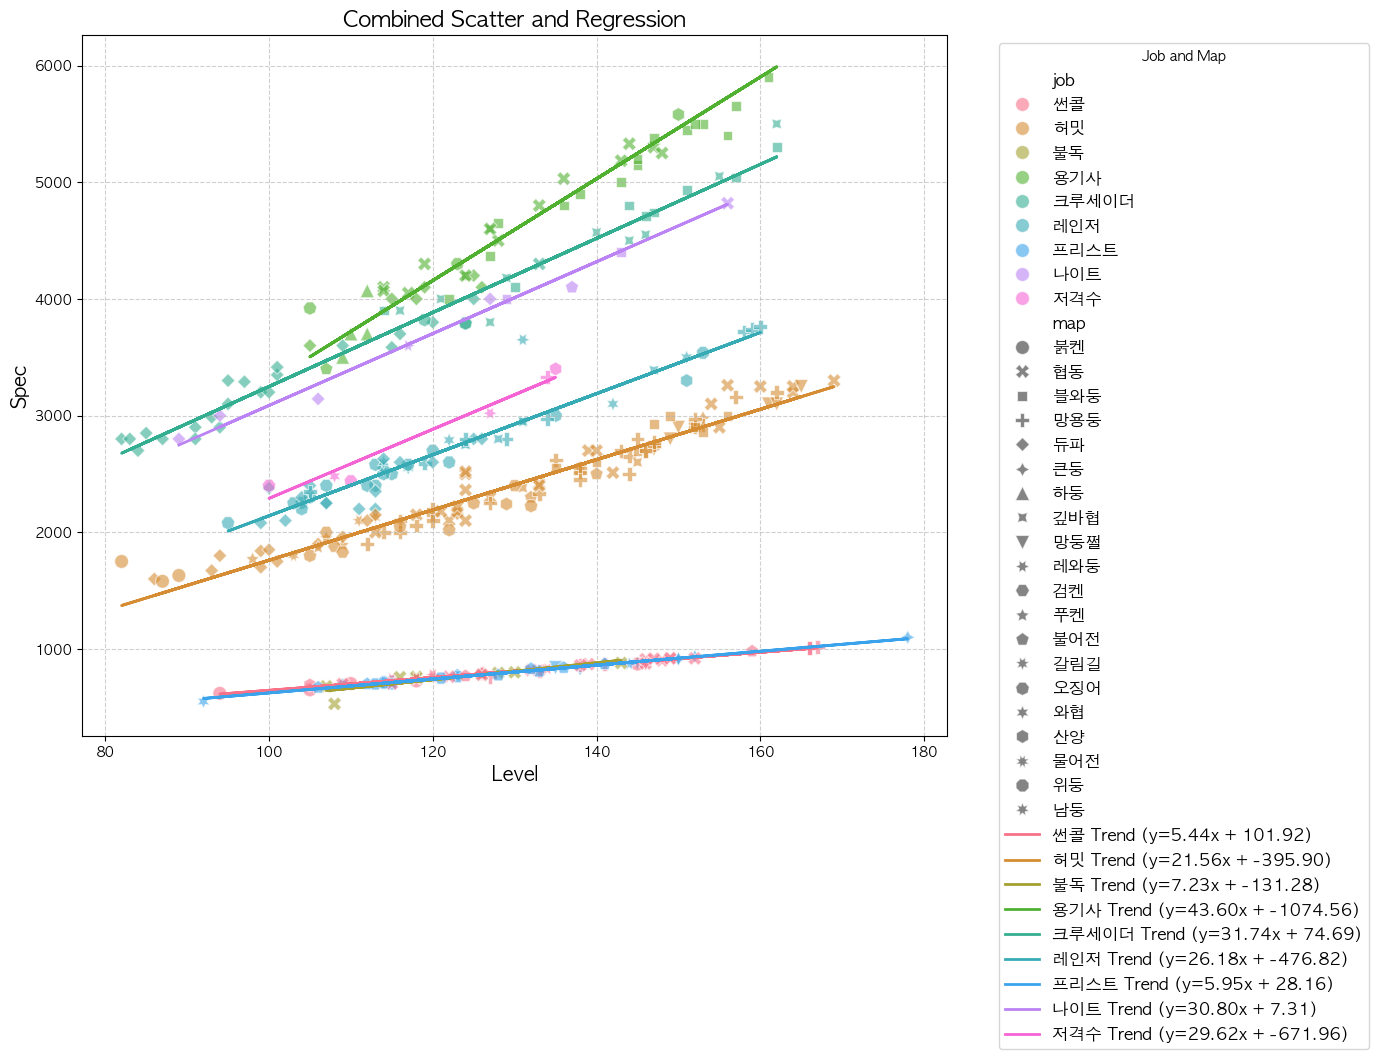

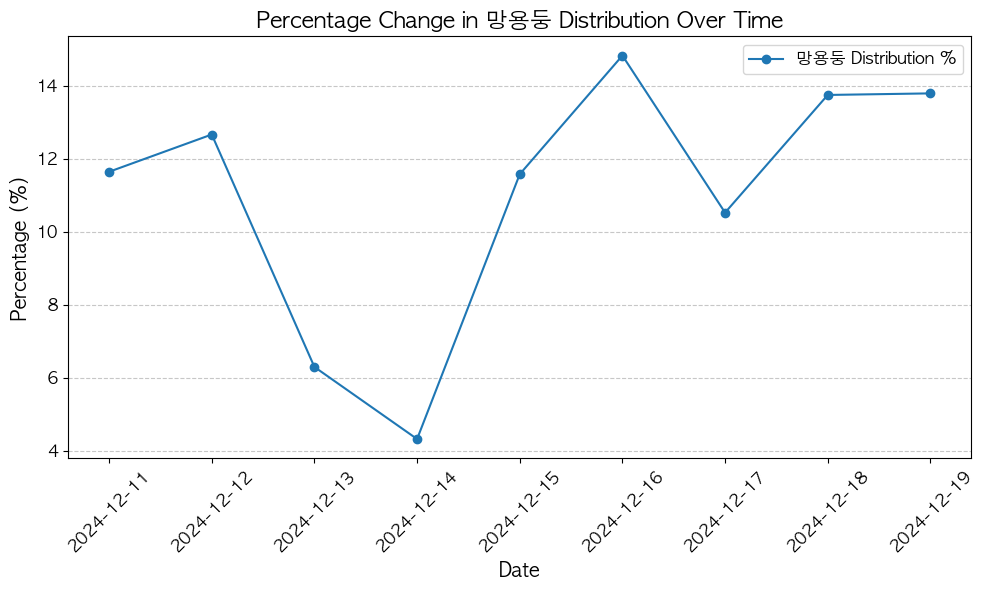

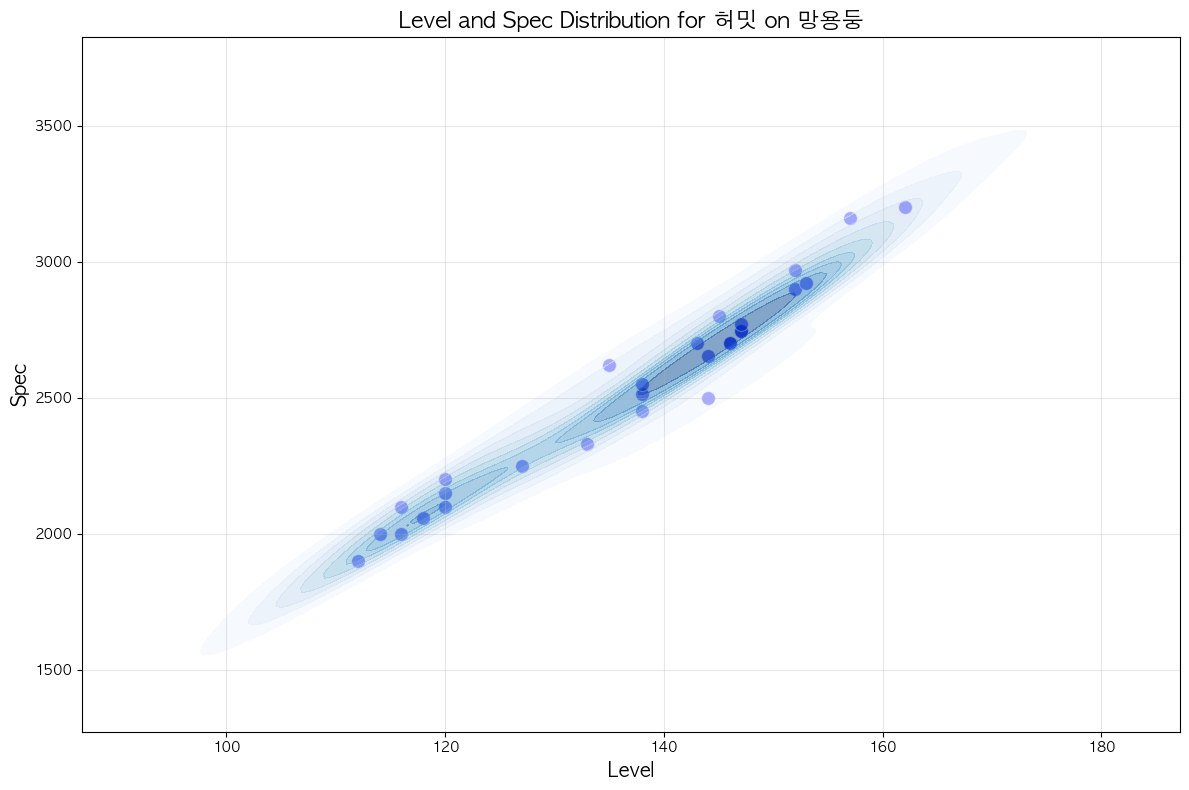

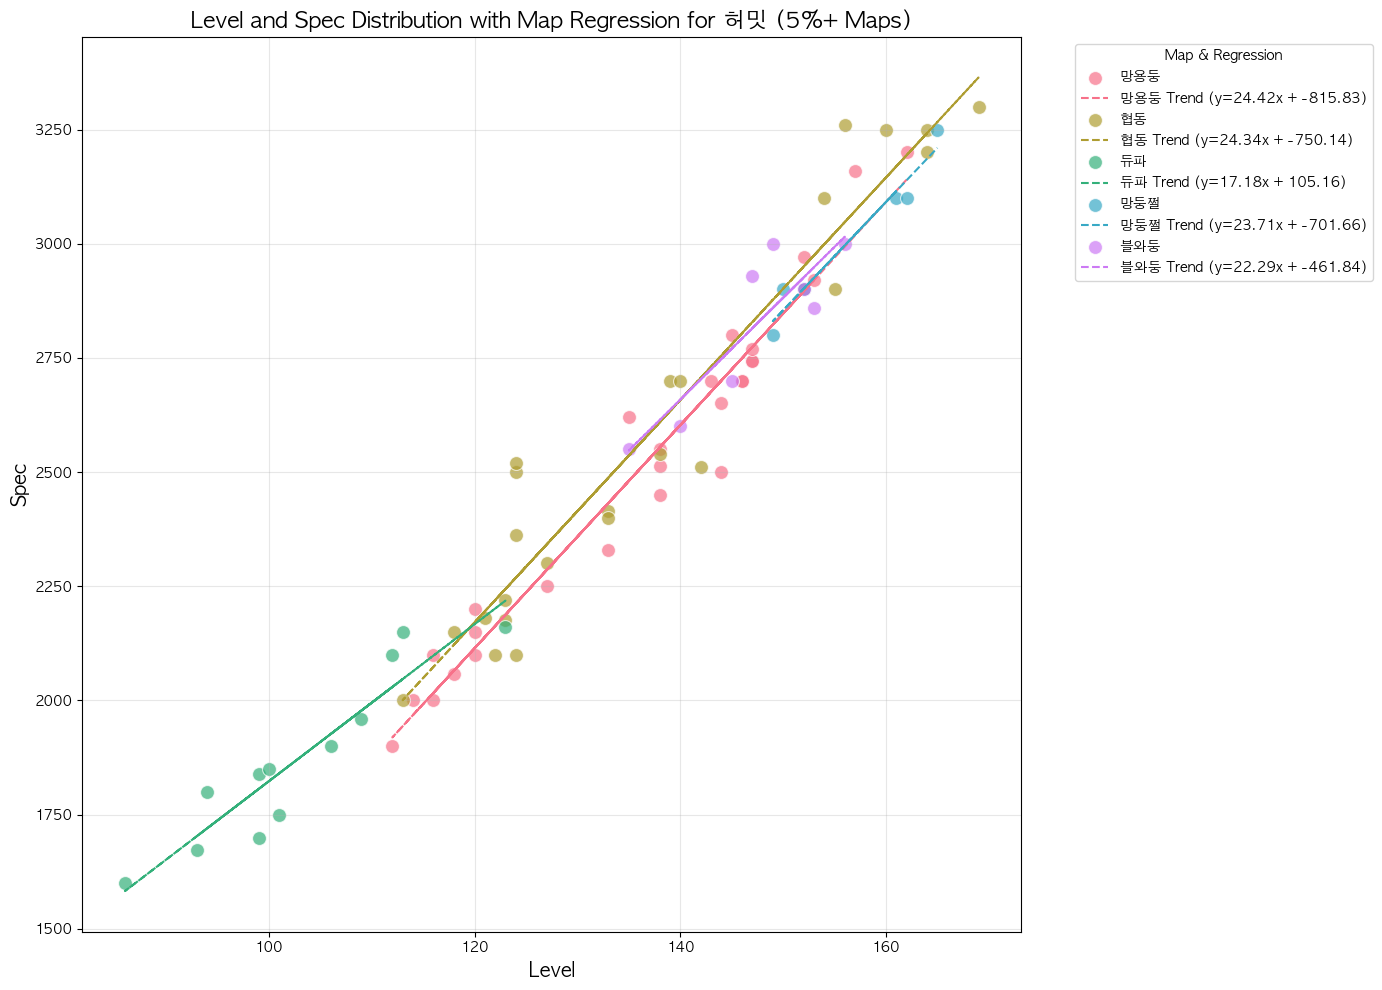

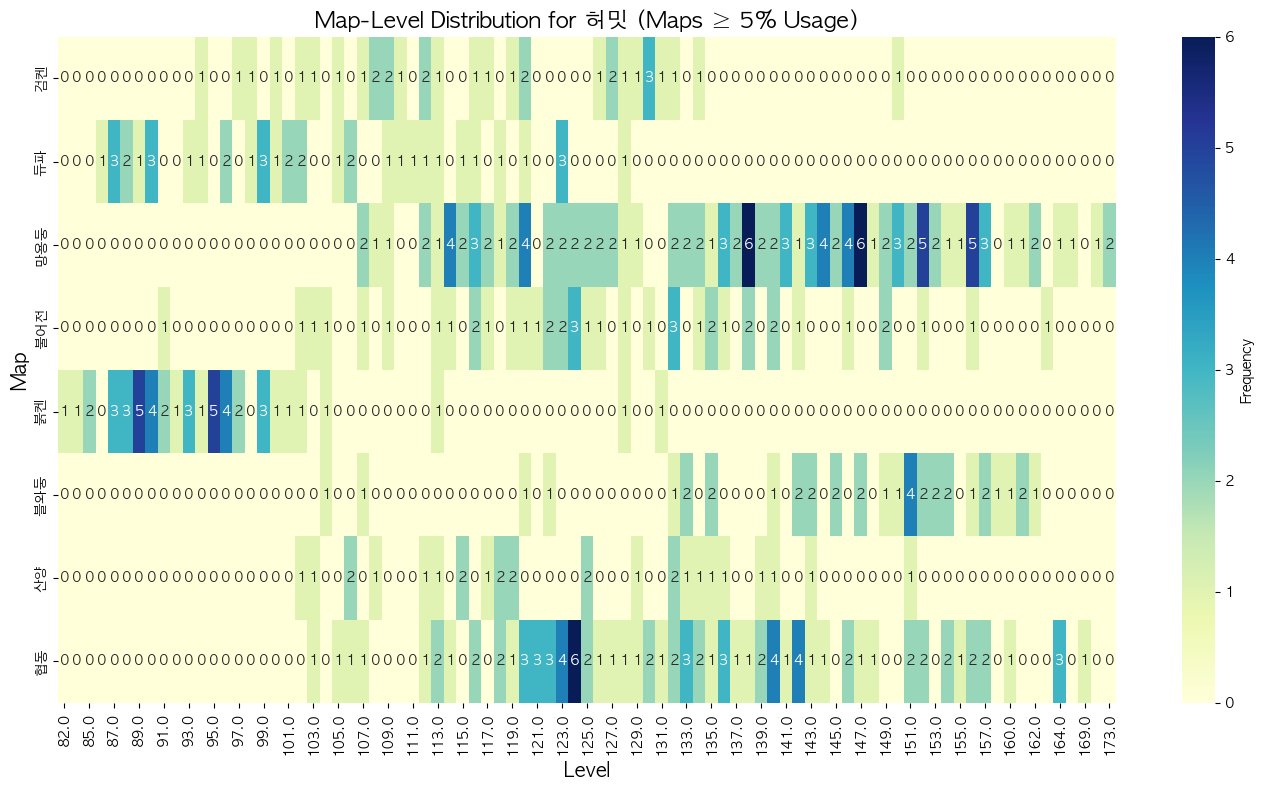

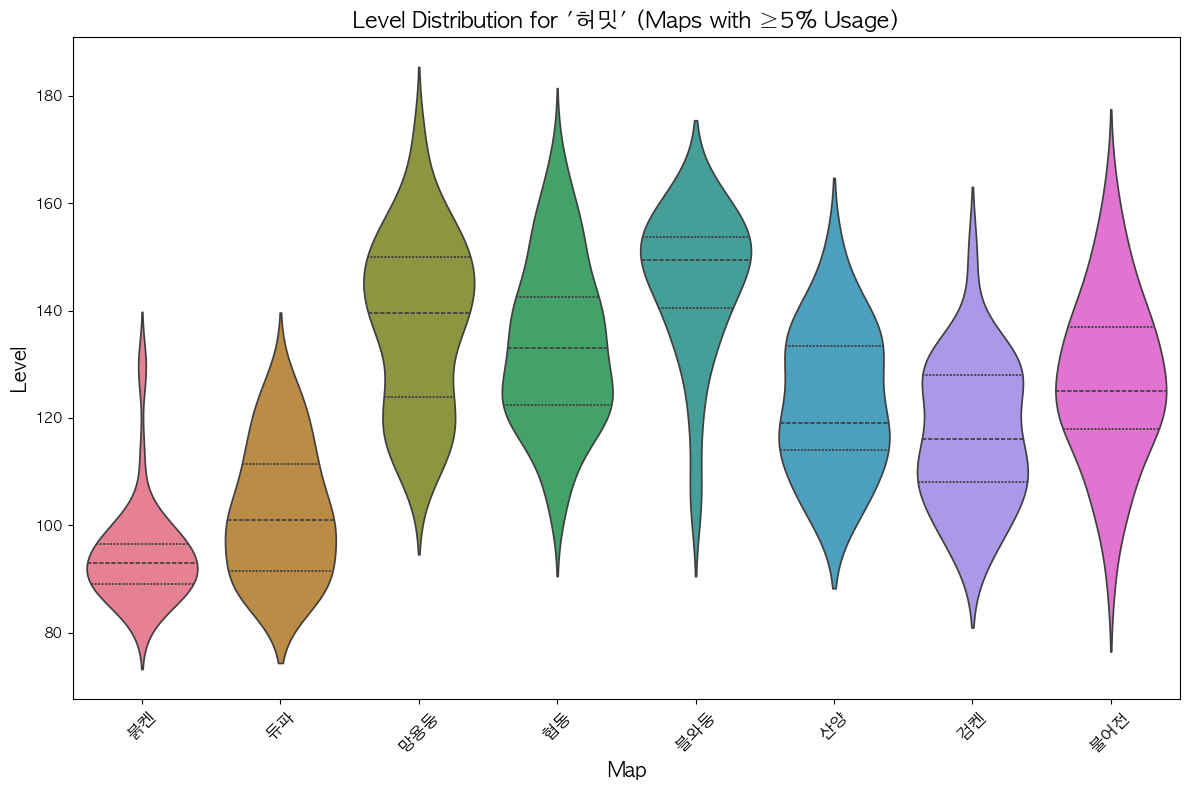

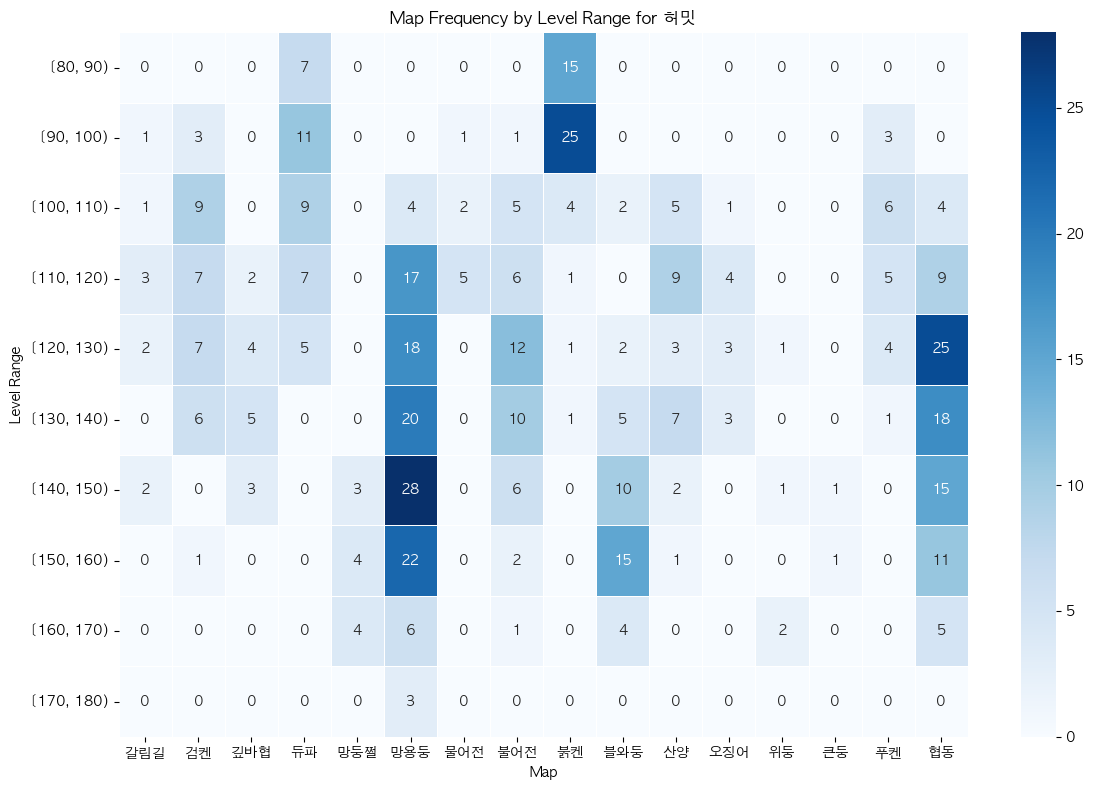

In [19]:
%run data_visualization.ipynb

job="허밋"
jobs=["허밋", "썬콜", "용기사"]
input_map="망용둥"
input_maps=["망용둥", "불어전"]
start_level=120
end_level=160
input_level=131

#1 직업별 평균 스펙
average_spec_by_job(df)
#2 맵별 직업 분포
plot_job_frequency_by_map(df)
#3 특정 직업, 레벨(optional), 스펙_filled
plot_level_spec_with_regression(df, job)
plot_level_spec_with_regression(df, job, input_level=input_level, use_spec_filled=True)
#4 레벨+-5의 스펙 회귀
plot_level_spec_with_regression_by_level(df, job, input_level)
#5 특정 직업의 레벨 별 맵 분포
plot_level_by_map_by_job(df, job)
#6 맵별 스펙 기재 여부
visualize_spec_validity_by_map(df, job='all')
#7 직업별 스펙 기재 여부, job optional
visualize_spec_validity_by_jobs(df, jobs=None)
#8 날짜별 맵 사용 비율
visualize_map_distribution_by_date(df)
#9 직업별 레벨(범위 설정 가능)당 스펙
visualize_level_spec_comparison(df, jobs=None, start_level=None, end_level=None)
#10 직업별 레벨에 따른 스공과 맵, 회귀
plot_combined_scatter_with_regression(df, start_level=None, end_level=None, maps=None)
#11 맵 사용빈도 변화 추이
visualize_map_percentage_change(df, input_map)
#12 특정 직업의 맵 레벨과 스펙에 따른 분포도 확인
plot_level_spec_distribution_of_job_and_map(df, input_map, job, use_spec_filled=False)
#13 특정 직업의 맵별분포와 레벨, 스펙 회귀
plot_level_spec_distribution_of_job(df, job)
#14 특정 직업의 레벨별 맵 히트맵
plot_map_level_heatmap_for_job(df, job)
#15 특정직업의 레벨별 사냥터 분포(5%+)
plot_level_distribution_by_job_and_map(df, job)
#16 특정직업의 레벨 범위별 사냥터 히트맵 
plot_map_frequency_by_level_range(df, job)

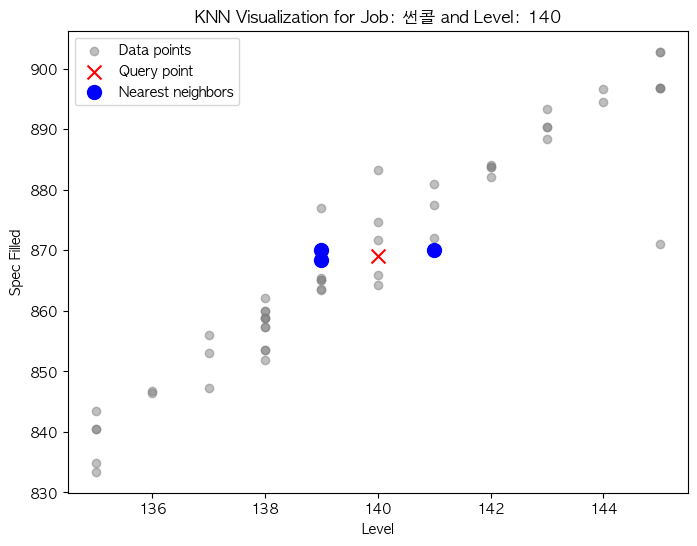

Recommended Maps and Scores: ['망용둥', '협동']
Unique maps after preprocessing:
['붉켄' '망용둥' '레와둥' '협동' '불어전']
Similarity scores for recommended maps:
Map: 레와둥, Score: 0.3333333333333335
Map: 망용둥, Score: 0.3333333333333332
Map: 불어전, Score: 0.33333333333333315


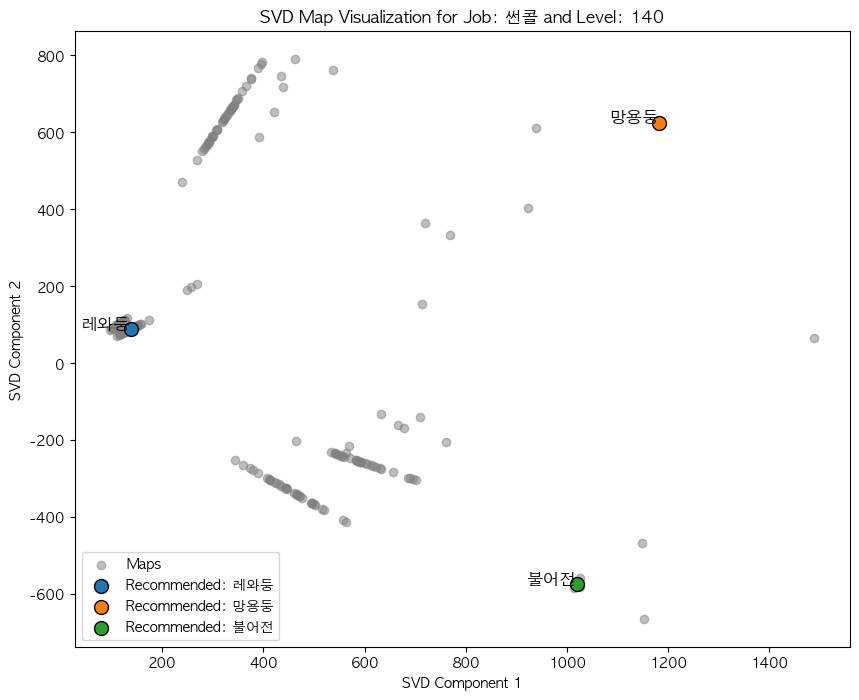

Recommended Maps: Index(['레와둥', '망용둥', '불어전'], dtype='object', name='map')


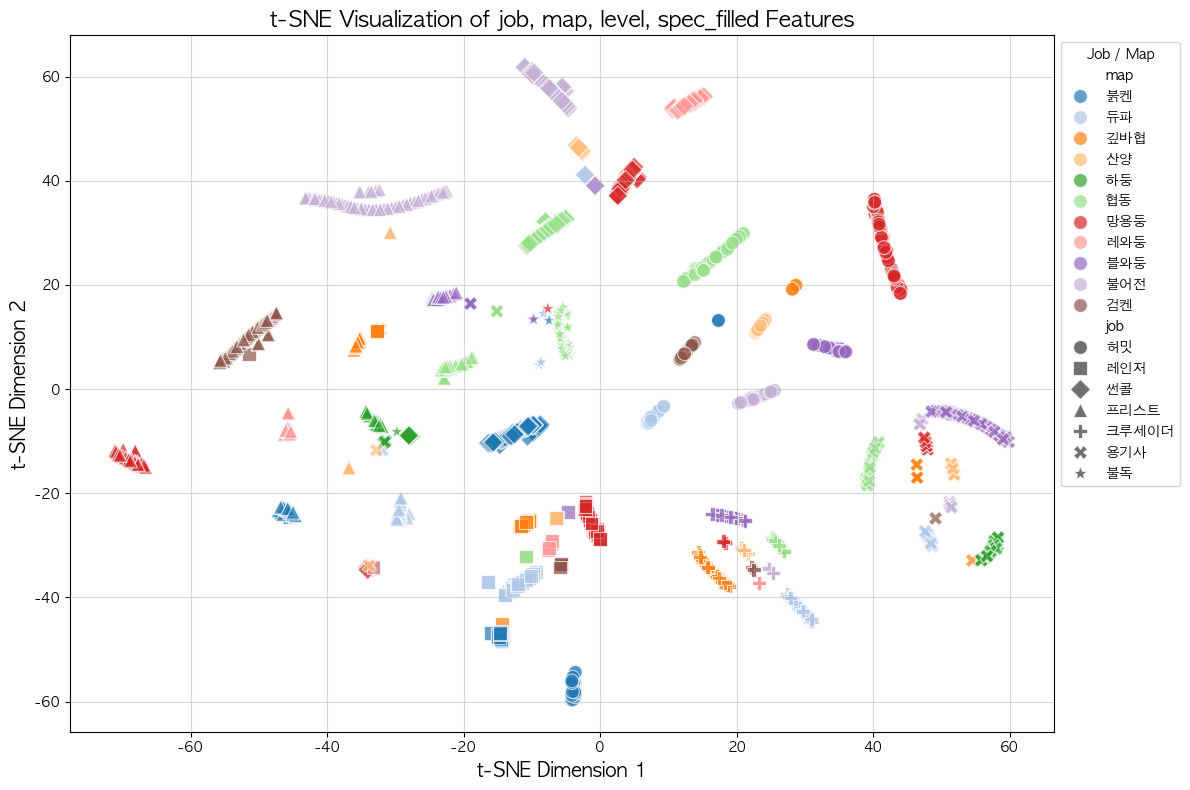

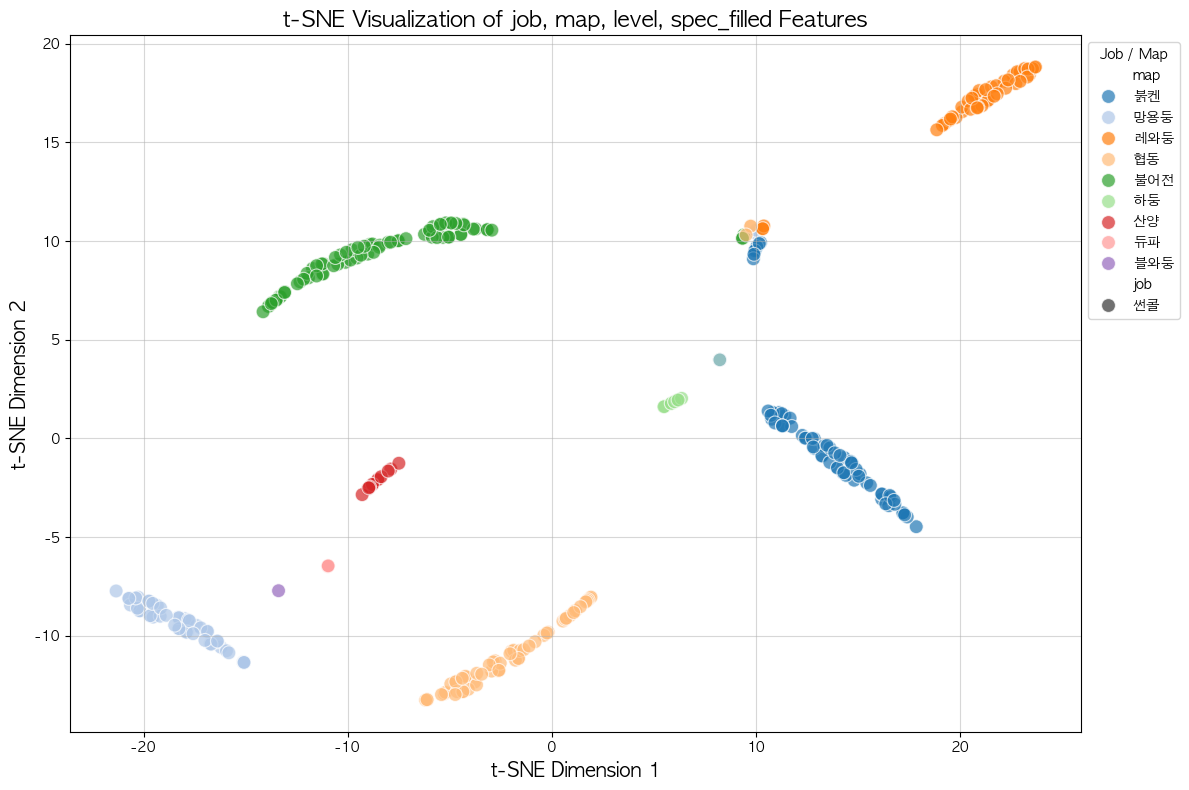

In [17]:
%run modeling.ipynb

recommend_map_knn(140, "썬콜", level_range=5)
recommend_map_svd(140, "썬콜", level_range=5)
tsne_visualization(df)
tsne_visualization(df, jobs=["썬콜"])

In [18]:
#by Willkie